UPDATE: Normalizing data
UPDATE: One-Hot Encoding data
Epoch 1/100
676/676 [==============================] - 89s 129ms/step - loss: 1.5683 - accuracy: 0.5547 - val_loss: 1.9217 - val_accuracy: 0.4870
Epoch 2/100
676/676 [==============================] - 68s 100ms/step - loss: 0.6540 - accuracy: 0.7940 - val_loss: 1.6828 - val_accuracy: 0.5422
Epoch 3/100
676/676 [==============================] - 64s 94ms/step - loss: 0.4437 - accuracy: 0.8599 - val_loss: 1.4171 - val_accuracy: 0.6204
Epoch 4/100
676/676 [==============================] - 65s 96ms/step - loss: 0.3474 - accuracy: 0.8879 - val_loss: 1.3795 - val_accuracy: 0.6371
Epoch 5/100
676/676 [==============================] - 87s 128ms/step - loss: 0.2914 - accuracy: 0.9069 - val_loss: 1.1979 - val_accuracy: 0.6861
Epoch 6/100
676/676 [==============================] - 77s 114ms/step - loss: 0.2569 - accuracy: 0.9178 - val_loss: 1.2760 - val_accuracy: 0.6861
Epoch 7/100
676/676 [==============================] - 75s 110ms/step -

676/676 [==============================] - 70s 104ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 0.9172 - val_accuracy: 0.7862
Epoch 57/100
676/676 [==============================] - 69s 102ms/step - loss: 0.0499 - accuracy: 0.9835 - val_loss: 0.8965 - val_accuracy: 0.8081
Epoch 58/100
676/676 [==============================] - 70s 103ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.9536 - val_accuracy: 0.8008
Epoch 59/100
676/676 [==============================] - 65s 97ms/step - loss: 0.0481 - accuracy: 0.9845 - val_loss: 0.8844 - val_accuracy: 0.7925
Epoch 60/100
676/676 [==============================] - 79s 117ms/step - loss: 0.0444 - accuracy: 0.9848 - val_loss: 0.9277 - val_accuracy: 0.7998
Epoch 61/100
676/676 [==============================] - 78s 115ms/step - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.9276 - val_accuracy: 0.7935
Epoch 62/100
676/676 [==============================] - 70s 103ms/step - loss: 0.0445 - accuracy: 0.9851 - val_loss: 0.8956 - val_ac

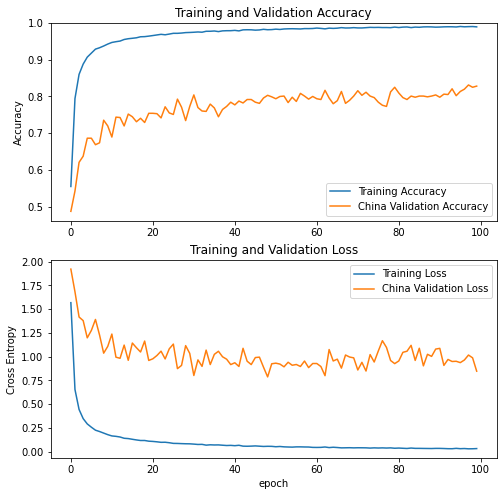

In [3]:
# import packages
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback
import argparse

# create neural network
class RoadSignClassifier:
    def createCNN(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(8, (5, 5), input_shape=inputShape, activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation="relu"))
        model.add(Dense(classes, activation="softmax"))
        return model


# load data
data_path_training = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/Combined Dataset/"
def load_training_data(dataset):
    images = []
    classes = []
    rows = pd.read_csv(dataset)
    rows = rows.sample(frac=1).reset_index(drop=True)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        # print(img_path)
        # print(img_class)
        # print(i)
        # print(row)
        image = os.path.join(data_path_training, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
        if i % 500 == 0:
            print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)
    X = np.array(images)
    y = np.array(classes)
    
    return (X, y)

data_path_testing= r"/Users/hdai/Documents/Junior Year/SML310/Final Project/Combined Dataset/Combined Total - separated"      
def load_testing_data(dataset):
    images = []
    classes = []
    rows = pd.read_csv(dataset)
    rows = rows.sample(frac=1).reset_index(drop=True)
    # print(rows)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        # print(img_path)
        # print(img_class)
        image = os.path.join(data_path_testing, img_path)
        image = cv2.imread(image)
        # print(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
        if i % 500 == 0:
            print(f"loaded: {i}")
        images.append(new_image)
        classes.append(int(img_class))
    X = np.array(images)
    y = np.array(classes)
    
    return (X, y)

#ap = argparse.ArgumentParser()
#ap.add_argument("-m", "--model", default="output/collaborativetrafficsignnet.model", help="path to output model")
#args = vars(ap.parse_args())


epochs = 100
learning_rate = 0.001
batch_size = 64

#Run this part for the first time and save the pre-processed data. So you do not have to process it every time
#train_data = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/Combined Dataset/Combined Total - separated/Combined training only correct.csv"
#test_data_China = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/Combined Dataset/Combined Total - separated/TSRD Test separated correct.csv"
#test_data_German = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/Combined Dataset/Combined Total - separated/GTSRB test separated.csv"
#(train_X, train_Y) = load_training_data(train_data)
#np.save('Collaborative_trainX',train_X)
#np.save('Collaborative_trainY',train_Y)
#(test_X_German, test_Y_German) = load_testing_data(test_data_German)
#np.save('Collaborative_GTSD_testX',test_X_German)
#np.save('Collaborative_GTSD_testY',test_Y_German)
#(test_X_China, test_Y_China) = load_testing_data(test_data_China)
#np.save('Collaborative_TSRD_testX',test_X_China)
#np.save('Collaborative_TSRD_testY',test_Y_China)


train_X = np.load('Collaborative_trainX.npy', allow_pickle=True)
train_Y = np.load('Collaborative_trainY.npy', allow_pickle=True)
test_X_China = np.load('Collaborative_TSRD_testX.npy', allow_pickle=True)
test_Y_China = np.load('Collaborative_TSRD_testY.npy', allow_pickle=True)
#test_X_German = np.load('Collaborative_GTSD_testX.npy', allow_pickle=True)
#test_Y_German = np.load('Collaborative_GTSD_testY.npy', allow_pickle=True)
print("UPDATE: Normalizing data")
trainX = train_X.astype("float32") / 255.0
testX_China = test_X_China.astype("float32") / 255.0
#testX_German = test_X_German.astype("float32") / 255.0
print("UPDATE: One-Hot Encoding data")
num_labels = len(np.unique(train_Y))
trainY = to_categorical(train_Y, num_labels)
testY_China = to_categorical(test_Y_China, num_labels)
#testY_German = to_categorical(test_Y_German, num_labels)

class_totals = trainY.sum(axis=0)
class_weight = class_totals.max() / class_totals

# data augmentation
data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)

# train model
model = RoadSignClassifier.createCNN(width=32, height=32, depth=3, classes=num_labels)
optimizer = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs))
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

#history = AdditionalValidationSets([(testX_China, testY_China, 'val2')])

fit = model.fit(
    data_aug.flow(trainX, trainY, batch_size=batch_size), 
    epochs=epochs,
    validation_data=(testX_China, testY_China),
    # class_weight=class_weight,
    # callbacks=[history],
    verbose=1)

#model.save("output/collaborativetrafficsignnet.model")

acc = fit.history['accuracy']
#val_acc_German = history.history['val_accuracy']
val_acc_China = fit.history['val_accuracy']

loss = fit.history['loss']
#val_loss_German = history.history['val_loss']
val_loss_China = fit.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc_German, label='German Validation Accuracy')
plt.plot(val_acc_China, label='China Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
#plt.plot(val_loss_German, label='German Validation Loss')
plt.plot(val_loss_China, label='China Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

np.save('Collaborative_China_100', [acc,loss,val_acc_China,val_loss_China])